In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pyprind

## EJERCICIO 1) Importance Sampling

#### 1) a) Utilice el algoritmo de Metrópolis para muestrear la distribución normal en una dimensión. Estudie el porcentaje de aceptación de movimientos y la función de correlación en función del tamaño del paso de exploración $\delta$

Muestramos la guassiana teórica y gráficamos un histograma de los puntos del muestro, graficados sobre una gaussiana
$$N(0,1) = \frac{1}{\sqrt{2 \pi}}e^{-\frac{x^2}{2}}$$

In [2]:
os.chdir(r'C:\Users\igna\Desktop\Igna\Facultad\Fisica computacional\TP2-Computacional-Ising\Ejercicio 1')
A = np.loadtxt('imp-samp-x0.txt')

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
 <a list of 10 Text yticklabel objects>)

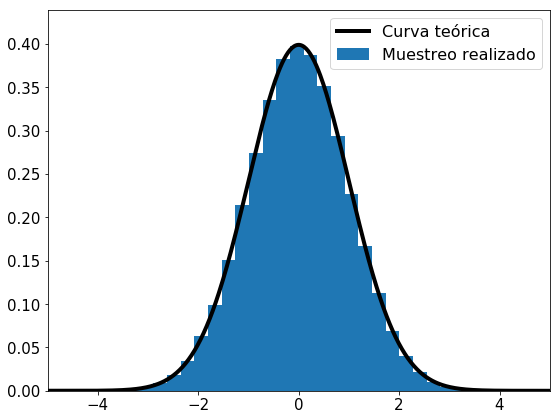

In [3]:
f = lambda x: (1/np.sqrt(2*np.pi))*np.exp(-x**2/2)
x = np.linspace(-10,10,1000)

#gaussiana muestreada
plt.figure(figsize = (9,7))
plt.hist(A[:,0],bins = 50, 
         density = True,
         label = 'Muestreo realizado')
plt.plot(x,f(x), label = 'Curva teórica', linewidth = 4, color = 'k')
plt.axis([-5,5,0,1.1*np.max(f(x))])
plt.legend(fontsize = 16)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#plt.savefig("Muestreo.pdf")

###### Estudio del porcentaje de aceptación de movimientos en función de $\delta$

In [4]:
A = np.loadtxt('IMP-SAMP-ACEPTvsDELTA.txt')

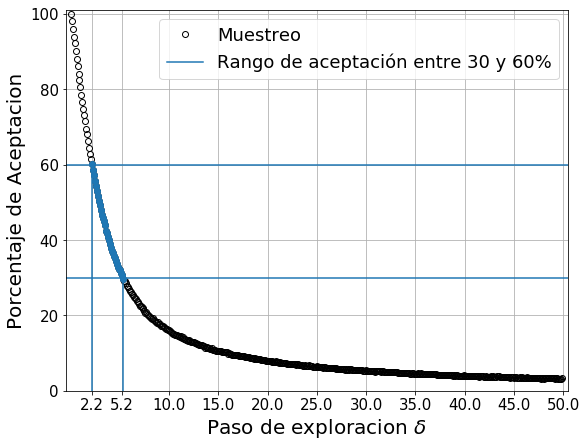

In [5]:
x2 = [2.2,2.2]
x5 = [5.3,5.3]
y2 = [-10,60]
y5 = [-10,30]
plt.figure(figsize = (9,7))
plt.plot(A[:,0],100*A[:,1],
         'ko',
         fillstyle = 'none',
         label = 'Muestreo')
plt.plot(A[22:54,0],100*A[22:54,1],'o')
plt.xlabel('Paso de exploracion $\delta$', fontsize = 20)
plt.ylabel('Porcentaje de Aceptacion',fontsize = 20)
plt.axhline(30, label = 'Rango de aceptación entre 30 y 60%')
plt.axhline(60)
plt.plot(x2,y2, color = "C0")
plt.plot(x5,y5, color = "C0")
plt.legend(fontsize = 18)
plt.grid()
plt.axis([-.5,50.5,0,101])
plt.yticks(fontsize = 15)
plt.xticks([2.2,5.2,10,15,20,25,30,35,40,45,50], fontsize = 15);
#plt.savefig("AceptVsDelta.pdf")

###### Estudio de la correlación en función del paso de exploración $\delta$

Notar
2) La correlación se vuelve en promedio negativa. Esto puede ser por: Problemas de redondeo + el hecho de usar numeros pseudoaleatorios. 

Método 2) Generando un vector de pasos largo, partiéndolo en partes iguales y calculándole el $C(k)$ a cada parte para luego promediar. Se observan los mismos fenómenos que en el caso anterior y cualitativamente los gráficos son iguales

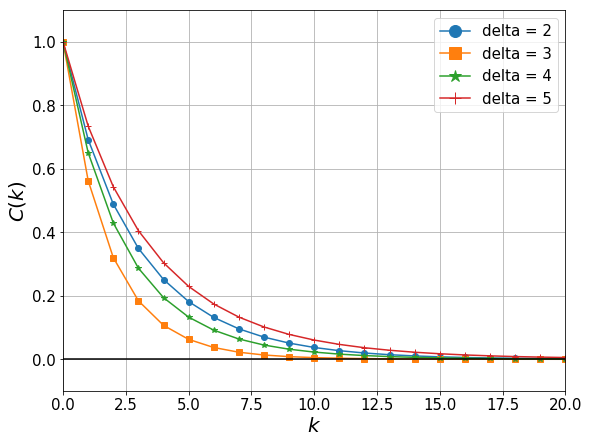

In [6]:
A = np.loadtxt('2705CorrelacionVSdelta_b.txt')
markers = ['o-','s-','*-','+-']
plt.figure(figsize = (9,7))
for i in range(len(A[:,0])):
    plt.plot(A[i,1:],markers[i], label = "delta = %i" % (i+2))
#plt.xscale('log')
plt.legend(fontsize = 15, markerscale = 2)
plt.axhline(0,color = 'k');
plt.grid(True, which = 'both');
plt.xlabel('$k$', fontsize = 20);
plt.ylabel('$C(k)$', fontsize = 20);
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.axis([0,20, -.1,1.1]);
#plt.axis([0,5000, -.01,0.01])
#plt.savefig("Correlacion2500.pdf")

#### 1) b) Utilice el muestreo generado para calcular 

$$ I = \int\limits_{-\infty}^{\infty} dx\, x^2\, e^{-\frac{x^2}{2}}$$

#### Estudie la dependencia del resultado con el tiemo de termalización y con el tamaño del muestreo.

In [7]:
A = np.loadtxt('IMP-SAMP-x0.txt')

In [8]:
#la integral, cuyo resultado es \sigma^2
sigma_cuadrado = sum(A[:,0]**2)/len(A[:,0])
print("sigma cuadrado es igual a %f" % sigma_cuadrado)
del A, sigma_cuadrado

sigma cuadrado es igual a 0.998319


In [9]:
A = np.loadtxt('TtermalizacionVSdelta.txt')

[0, 1500, -1, 3]

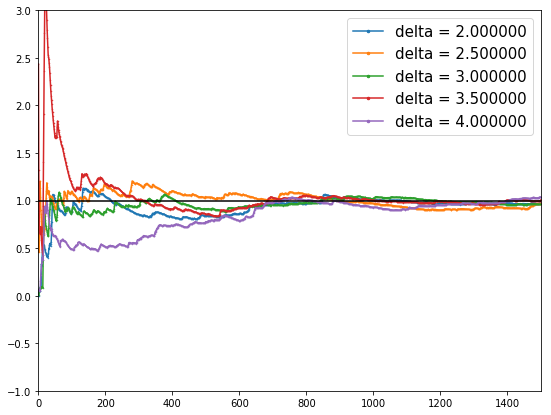

In [10]:
#la dependencia con el tiempo de termalizacion y el tamaño de muestreo
plt.figure(figsize = (9,7))
B = [2.5,3.5,4,4.5,5.5]
for i in range(len(B)):
    plt.plot(A[i,1:],'.-', markersize = 1, label = "delta = %f" % A[i,0] )
plt.legend(fontsize = 15,markerscale = 5, loc = 'upper right')
plt.axhline(1,color = 'k')
plt.axis([0,1500,-1,3])

Text(0.05,0.5,'valor de $\\sigma^2$')

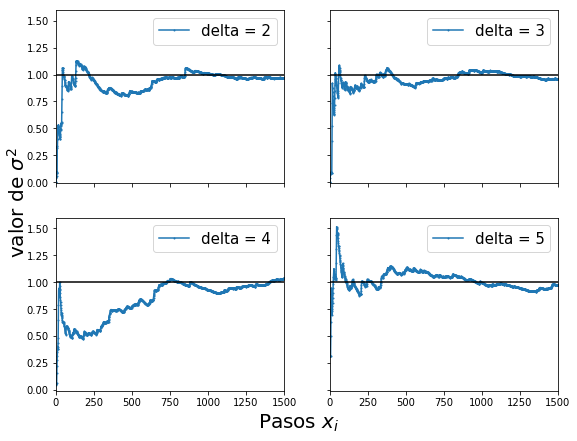

In [11]:
fig, axs = plt.subplots(ncols = 2, nrows = 2, sharex = True, sharey = True, figsize = (9,7))
axs[0,0].plot(A[0,1:],'.-', markersize = 2, label = "delta = %i" % A[0,0])
axs[0,0].axis([-0.5,1500,-.01,1.6])
axs[0,0].axhline(1, color = 'k')
axs[0,0].legend(fontsize = 15)

axs[0,1].plot(A[2,1:],'.-', markersize = 2, label = "delta = %i" % A[2,0])
axs[0,1].axis([-0.5,1500,-.01,1.6])
axs[0,1].axhline(1, color = 'k')
axs[0,1].legend(fontsize = 15)

axs[1,0].plot(A[4,1:],'.-', markersize = 2, label = "delta = %i" % A[4,0])
axs[1,0].axis([-0.5,1500,-.01,1.6])
axs[1,0].axhline(1, color = 'k')
axs[1,0].legend(fontsize = 15)

axs[1,1].plot(A[6,1:],'.-', markersize = 2, label = "delta = %i" % A[6,0])
axs[1,1].axis([-0.5,1500,-.01,1.6])
axs[1,1].axhline(1, color = 'k')
axs[1,1].legend(fontsize = 15);

fig.text(0.5, 0.05, 'Pasos $x_{i}$', ha='center', fontsize = 20)
fig.text(0.05, 0.5, 'valor de $\sigma^2$', va='center', rotation='vertical', fontsize = 20)
#plt.savefig("Sigma.pdf")

Se observan las curvas obtenidas para muestreos con diferentes valores de $\delta$, aproximadamente los correspondientes a donde se obtiene entre el 30% y 60% de aceptación de pasos. No se ve claramente para qué valor de $\delta$ la curva se aproxima más rapido al valor esperado 1, pero se ve que en promedio, para todos los delta muestreados, luego de los primeros 1000 pasos los valores alcanzan su estado estacionario.

## EJERCICIO 2) Ising 2D

#### Considere un arreglo cuadrangular de spines $s_{i} = \pm 1$ con condiciones periódicas de contorno. El Hamiltoniano del sistema está dado por

\begin{equation}
    H 
    = -J \sum\limits_{\langle i,j \rangle}
    s_{i}s_{j}
    -B\sum\limits_{i}s_{i} 
\end{equation}

###### 2)a) Si $J = 0$, obtener las expresiones analíticas de las variables termodinámicas y compare con los resultados de las simulaciones

Las variables termodinámicas, son, en rigor:

$\langle s_{i} \rangle = \frac{M}{N} = \frac{\langle M \rangle}{N} = \tanh{(\beta\,B)}$

$\langle \epsilon_{i} \rangle = \frac{E}{N} = \frac{\langle E \rangle}{N} = \frac{U}{N} = - B\tanh{(\beta\,B)}$

$\chi = \frac{\langle M^2 \rangle - \langle M \rangle^2}{kT^2} =\frac{N\beta}{\cosh^{2}(\beta B)}$

$C_{v} = \frac{\langle E^2 \rangle - \langle E \rangle^2}{kT^2} = \frac{Nk (\beta B)^2}{ \cosh^{2}{(\beta B)}}$,

aunque para este punto me dijo Facu que la única relevante es $M$. Si hay tiempo hacemos $C$ y $\chi$

In [12]:
os.chdir(r'C:\Users\igna\Desktop\Igna\Facultad\Fisica computacional\TP2-Computacional-Ising\Ejercicio 2\item a)')

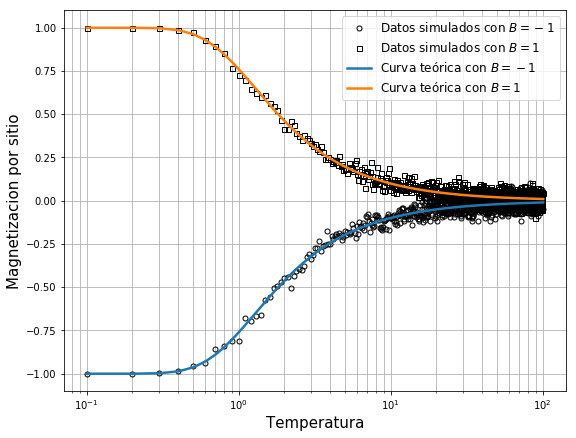

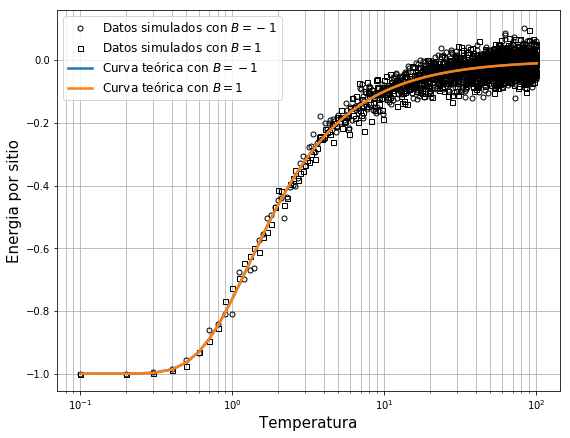

In [13]:
#%%
A_neg = np.loadtxt("MvsT_dim32_Bneg1.0_Pasos1000.txt")
A_pos = np.loadtxt("MvsT_dim32_Bpos1.0_Pasos1000.txt")  
T = np.linspace(0.1,101,1000)
Mag = lambda x,B: np.tanh(B/x)
Ener = lambda x,B: -B*np.tanh(B/x)

plt.figure(figsize = (9,7))
plt.plot(A_neg[:,0],A_neg[:,1],'ko', markersize = 5,fillstyle = "none", label = "Datos simulados con $B=-1$")
plt.plot(A_pos[:,0],A_pos[:,1],'ks', markersize = 5,fillstyle = "none", label = "Datos simulados con $B=1$")
plt.plot(T,Mag(T,-1), linewidth = 2.5, label = "Curva teórica con $B = -1$")
plt.plot(T,Mag(T,1), linewidth = 2.5, label = "Curva teórica con $B = 1$")

plt.xscale('log')
plt.xlabel("Temperatura", fontsize = 15)
plt.ylabel("Magnetizacion por sitio", fontsize = 15)
plt.legend(fontsize = 12)
plt.grid(True, which = 'both')


plt.figure(figsize = (9,7))
plt.plot(A_neg[:,0],A_neg[:,2],'ko', markersize = 5,fillstyle = "none", label = "Datos simulados con $B=-1$")
plt.plot(A_pos[:,0],A_pos[:,2],'ks', markersize = 5,fillstyle = "none", label = "Datos simulados con $B=1$")
plt.plot(T,Ener(T,-1), linewidth = 2.5, label = "Curva teórica con $B = -1$")
plt.plot(T,Ener(T,1), linewidth = 2.5, label = "Curva teórica con $B = 1$")

plt.xscale('log')
plt.xlabel("Temperatura", fontsize = 15)
plt.ylabel("Energia por sitio", fontsize = 15)
plt.legend(fontsize = 12)
plt.grid(True, which = 'both')

Estos son, respectivamente, graficos de magnetización media por sitio $M/N$ en función de la temperatura, para $B$ tanto positivo como negativo, graficados contra la función obtenida teóricamente; y la energía media por sitio $E/N$

Estos gráficos corresponden a simulaciones sobre redes de 32x32 con 1000 barridos totales sobre la red, para cada temperatura (el nombre del .txt indica esos parámetros)

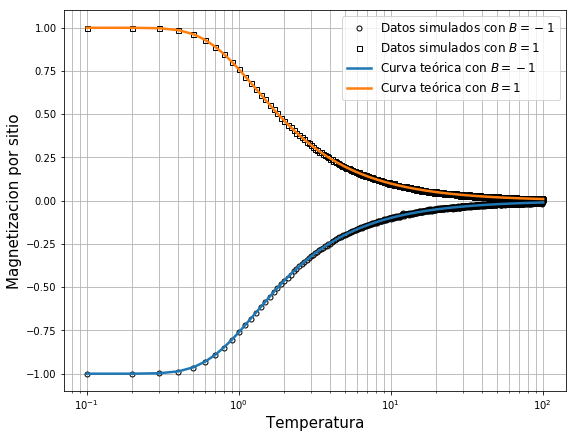

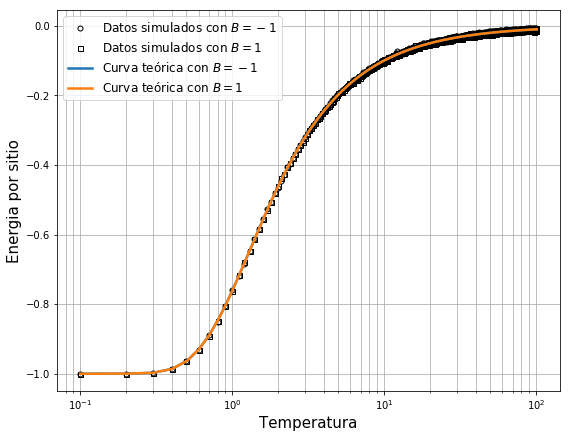

In [14]:
#%%
A_neg = np.loadtxt("MvsT_dim32_Bneg1.0_Pasos_1000_prom.txt")
A_pos = np.loadtxt("MvsT_dim32_Bpos1.0_Pasos_1000_prom.txt")  
T = np.linspace(0.1,101,1000)
Mag = lambda x,B: np.tanh(B/x)
Ener = lambda x,B: -B*np.tanh(B/x)

plt.figure(figsize = (9,7))
plt.plot(A_neg[:,0],A_neg[:,1],'ko', markersize = 5,fillstyle = "none", label = "Datos simulados con $B=-1$")
plt.plot(A_pos[:,0],A_pos[:,1],'ks', markersize = 5,fillstyle = "none", label = "Datos simulados con $B=1$")
plt.plot(T,Mag(T,-1), linewidth = 2.5, label = "Curva teórica con $B = -1$")
plt.plot(T,Mag(T,1), linewidth = 2.5, label = "Curva teórica con $B = 1$")

plt.xscale('log')
plt.xlabel("Temperatura", fontsize = 15)
plt.ylabel("Magnetizacion por sitio", fontsize = 15)
plt.legend(fontsize = 12)
plt.grid(True, which = 'both')


plt.figure(figsize = (9,7))
plt.plot(A_neg[:,0],A_neg[:,4],'ko', markersize = 5,fillstyle = "none", label = "Datos simulados con $B=-1$")
plt.plot(A_pos[:,0],A_pos[:,4],'ks', markersize = 5,fillstyle = "none", label = "Datos simulados con $B=1$")
plt.plot(T,Ener(T,-1), linewidth = 2.5, label = "Curva teórica con $B = -1$")
plt.plot(T,Ener(T,1), linewidth = 2.5, label = "Curva teórica con $B = 1$")

plt.xscale('log')
plt.xlabel("Temperatura", fontsize = 15)
plt.ylabel("Energia por sitio", fontsize = 15)
plt.legend(fontsize = 12)
plt.grid(True, which = 'both')

Estos gráficos de abajo son análogos a los de arriba, pero esta vez se promediaron 200 veces el muestreo numero 1000 de la red, para cada temperatura, de forma de suavizar los datos. Son buenos resultados. Además el .txt tiene guardado $\langle M^2 \rangle$ y $\langle M \rangle^2$, para intentar calcular $\chi$ y $C_{V}$

###### 2)b) Si $B = 0$, y $L = 32$, estudiar el comportamiento del sistema para $J \in [0.1, 0.6]$. Estudiar la frecuencia de sampleo adecuada para cada constante de acoplamiento viendo las correlaciones.

Gráfico del comportamiento del sistema para $J \in [0.1; 0.6]$

### red de $4\times 4$

Se realizaron las simulaciones variando $J$ para sistemas TERMALIZADOS

In [15]:
os.chdir(r"c:\users\igna\desktop\igna\facultad\fisica computacional\tp2-computacional-ising\ejercicio 2\item b)")

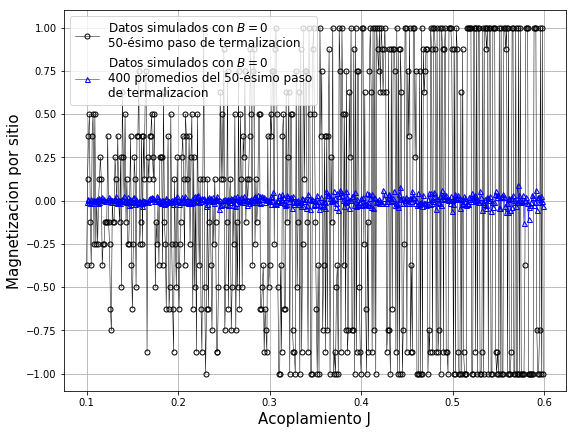

In [16]:
A = np.loadtxt("MvsJ_dim4_T1.00_Pasos1000_prom1000.txt")

plt.figure(figsize = (9,7))
plt.plot(A[:,0],A[:,1]/(4*4),
         'ko-',
         linewidth = .5,
         markersize = 5,
         fillstyle = "none",
         label = "Datos simulados con $B=0$\n50-ésimo paso de termalizacion")
plt.plot(A[:,0],A[:,2],
         'b^-',
         linewidth = .5,
         markersize = 5,
         fillstyle = "none",
         label = "Datos simulados con $B=0$\n400 promedios del 50-ésimo paso\nde termalizacion")
plt.xlabel("Acoplamiento J", fontsize = 15)
plt.ylabel("Magnetizacion por sitio", fontsize = 15)
plt.legend(fontsize = 12)
plt.grid(True, which = 'both')

### red de $16\times 16$

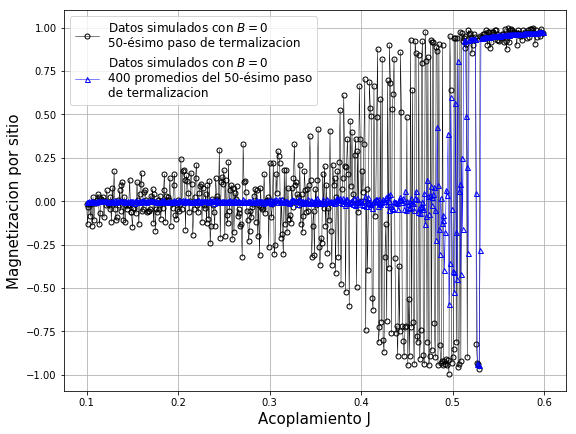

In [17]:
A = np.loadtxt("MvsJ_dim16_T1.00_Pasos1000_prom1000.txt")

plt.figure(figsize = (9,7))
plt.plot(A[:,0],A[:,1]/(16*16),
         'ko-',
         linewidth = .5,
         markersize = 5,
         fillstyle = "none",
         label = "Datos simulados con $B=0$\n50-ésimo paso de termalizacion")
plt.plot(A[:,0],A[:,2],
         'b^-',
         linewidth = .5,
         markersize = 5,
         fillstyle = "none",
         label = "Datos simulados con $B=0$\n400 promedios del 50-ésimo paso\nde termalizacion")
plt.xlabel("Acoplamiento J", fontsize = 15)
plt.ylabel("Magnetizacion por sitio", fontsize = 15)
plt.legend(fontsize = 12)
plt.grid(True, which = 'both')

### red de $32\times 32$

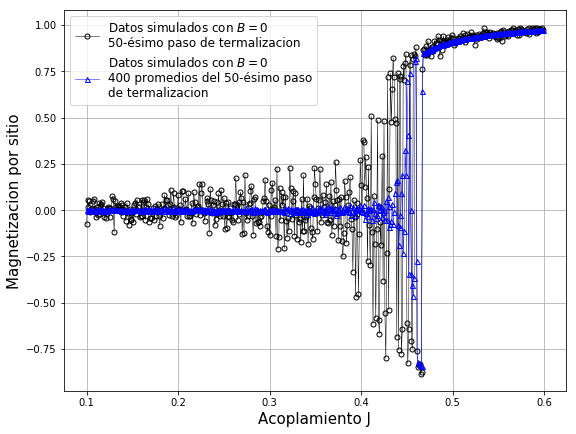

In [18]:
name = "MvsJ_dim32_T1.00_Pasos200_prom200.txt"
A = np.loadtxt(name)

plt.figure(figsize = (9,7))
plt.plot(A[:,0],A[:,1],
         'ko-',
         linewidth = .5,
         markersize = 5,
         fillstyle = "none",
         label = "Datos simulados con $B=0$\n50-ésimo paso de termalizacion")
plt.plot(A[:,0],A[:,2],
         'b^-',
         linewidth = .5,
         markersize = 5,
         fillstyle = "none",
         label = "Datos simulados con $B=0$\n400 promedios del 50-ésimo paso\nde termalizacion")
plt.xlabel("Acoplamiento J", fontsize = 15)
plt.ylabel("Magnetizacion por sitio", fontsize = 15)
plt.legend(fontsize = 12)
plt.grid(True, which = 'both')

### red de $64\times 64$

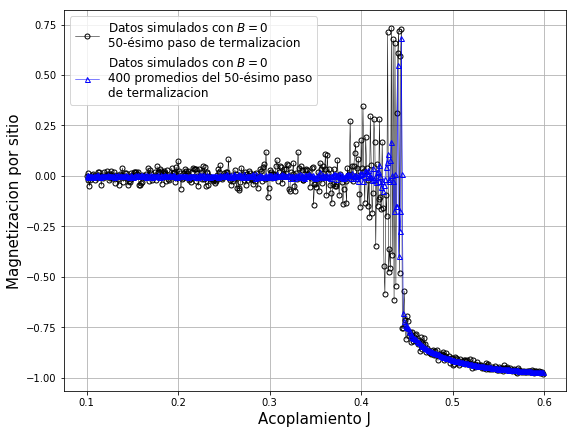

In [19]:
A = np.loadtxt("MvsJ_dim64_T1.00_Pasos200_prom100.txt")

plt.figure(figsize = (9,7))
plt.plot(A[:,0],A[:,1]/(64*64),
         'ko-',
         linewidth = .5,
         markersize = 5,
         fillstyle = "none",
         label = "Datos simulados con $B=0$\n50-ésimo paso de termalizacion")
plt.plot(A[:,0],A[:,2],
         'b^-',
         linewidth = .5,
         markersize = 5,
         fillstyle = "none",
         label = "Datos simulados con $B=0$\n400 promedios del 50-ésimo paso\nde termalizacion")
plt.xlabel("Acoplamiento J", fontsize = 15)
plt.ylabel("Magnetizacion por sitio", fontsize = 15)
plt.legend(fontsize = 12)
plt.grid(True, which = 'both')

### red de $128\times 128$

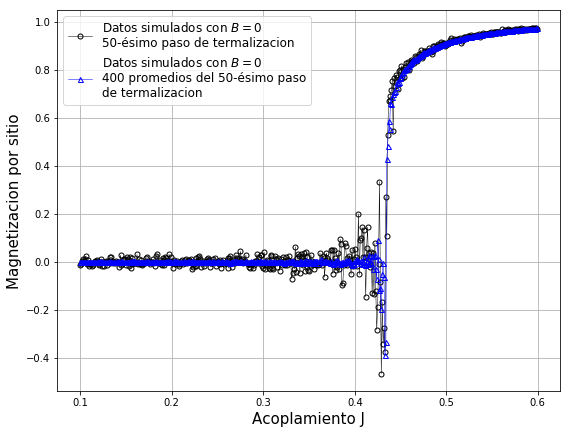

In [20]:
A = np.loadtxt("MvsJ_dim128_T1.00_Pasos100_prom100.txt")

plt.figure(figsize = (9,7))
plt.plot(A[:,0],A[:,1]/(128*128),
         'ko-',
         linewidth = .5,
         markersize = 5,
         fillstyle = "none",
         label = "Datos simulados con $B=0$\n50-ésimo paso de termalizacion")
plt.plot(A[:,0],A[:,2],
         'b^-',
         linewidth = .5,
         markersize = 5,
         fillstyle = "none",
         label = "Datos simulados con $B=0$\n400 promedios del 50-ésimo paso\nde termalizacion")
plt.xlabel("Acoplamiento J", fontsize = 15)
plt.ylabel("Magnetizacion por sitio", fontsize = 15)
plt.legend(fontsize = 12)
plt.grid(True, which = 'both')

### red de $256\times 256$

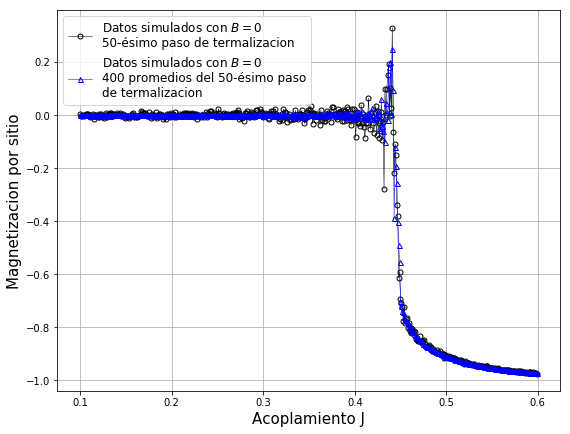

In [21]:
A = np.loadtxt("MvsJ_dim256_T1.00_Pasos100_prom20.txt")

plt.figure(figsize = (9,7))
plt.plot(A[:,0],A[:,1],
         'ko-',
         linewidth = .5,
         markersize = 5,
         fillstyle = "none",
         label = "Datos simulados con $B=0$\n50-ésimo paso de termalizacion")
plt.plot(A[:,0],A[:,2],
         'b^-',
         linewidth = .5,
         markersize = 5,
         fillstyle = "none",
         label = "Datos simulados con $B=0$\n400 promedios del 50-ésimo paso\nde termalizacion")
plt.xlabel("Acoplamiento J", fontsize = 15)
plt.ylabel("Magnetizacion por sitio", fontsize = 15)
plt.legend(fontsize = 12)
plt.grid(True, which = 'both')

### red de $512\times 512$

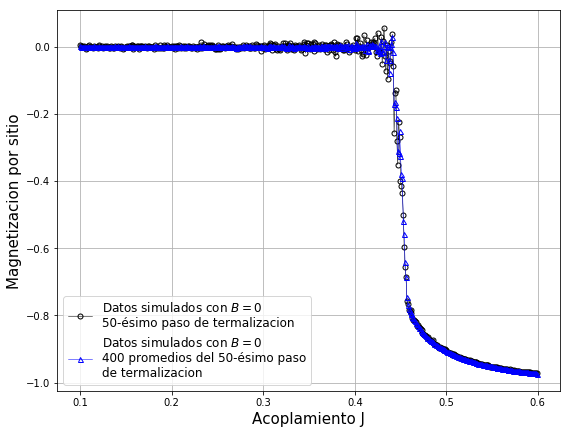

In [22]:
A = np.loadtxt("MvsJ_dim512_T1.00_Pasos100_prom20.txt")

plt.figure(figsize = (9,7))
plt.plot(A[:,0],A[:,1],
         'ko-',
         linewidth = .5,
         markersize = 5,
         fillstyle = "none",
         label = "Datos simulados con $B=0$\n50-ésimo paso de termalizacion")
plt.plot(A[:,0],A[:,2],
         'b^-',
         linewidth = .5,
         markersize = 5,
         fillstyle = "none",
         label = "Datos simulados con $B=0$\n400 promedios del 50-ésimo paso\nde termalizacion")
plt.xlabel("Acoplamiento J", fontsize = 15)
plt.ylabel("Magnetizacion por sitio", fontsize = 15)
plt.legend(fontsize = 12)
plt.grid(True, which = 'both')

### red de $1024\times 1024$

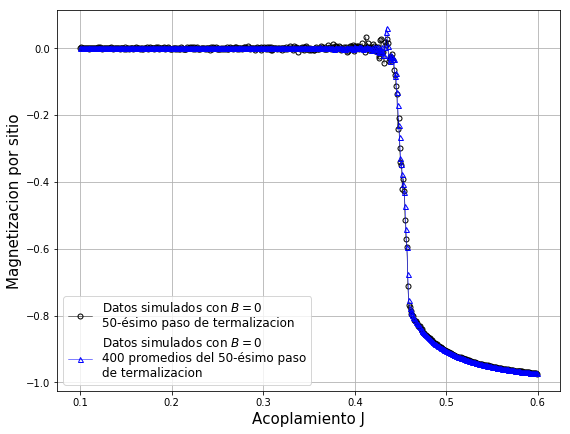

In [23]:
A = np.loadtxt("MvsJ_dim1024_T1.00_Pasos100_prom50.txt")

plt.figure(figsize = (9,7))
plt.plot(A[:,0],A[:,1],
         'ko-',
         linewidth = .5,
         markersize = 5,
         fillstyle = "none",
         label = "Datos simulados con $B=0$\n50-ésimo paso de termalizacion")
plt.plot(A[:,0],A[:,2],
         'b^-',
         linewidth = .5,
         markersize = 5,
         fillstyle = "none",
         label = "Datos simulados con $B=0$\n400 promedios del 50-ésimo paso\nde termalizacion")
plt.xlabel("Acoplamiento J", fontsize = 15)
plt.ylabel("Magnetizacion por sitio", fontsize = 15)
plt.legend(fontsize = 12)
plt.grid(True, which = 'both')


### CORRELACIONES:
## atención: acá se repoblaron las redes, es decir, se destermalizó el sistema para cada $J$

In [24]:
def Correlacion(x,k):
    N = len(x)
    K = N-k
    xk_mean_comb = []
    xk_mean = []
    xk2_mean = []
    x_mean = []
    x2_mean = []
    
    for i in range(K):
        xk_mean_comb.append(x[i+k]*x[i])
        xk_mean.append(x[i+k])
        xk2_mean.append(x[i+k]**2)
        x_mean.append(x[i])
        x2_mean.append(x[i]**2)
    
    xk_mean_comb = sum(xk_mean_comb)/K
    xk_mean = sum(xk_mean)/K
    xk2_mean = sum(xk2_mean)/K
    x_mean = sum(x_mean)/K
    x2_mean = sum(x2_mean)/K
    x_mean2 = x_mean**2
    xk_mean2 = xk_mean**2
    
    numerador = xk_mean_comb - x_mean*xk_mean
    denominador = (x2_mean - x_mean2)*(xk2_mean - xk_mean2)
    c_k = (xk_mean_comb - x_mean*xk_mean)/np.sqrt((x2_mean - x_mean**2)*(xk2_mean - xk_mean2))
 
    return c_k

In [25]:
os.chdir(r"C:\Users\igna\Desktop\Igna\Facultad\Fisica computacional")
#A = np.loadtxt("Correlacion_EvsJ_dim32_Barridos1100000.txt")
#B = np.loadtxt("Correlacion_MvsJ_dim32_Barridos1100000.txt")
#C = np.loadtxt("correlacion_MvsJ_dim16_barridos1100000.txt")

In [26]:
def corrnp(X,i):
    """
    llama a la funcion corrcoef de numpy, pero
    la hice para que le des la notacion simplificada
    de Correlacion (la casera). Tiene la ventana
    de que tarda 10 veces menos que la casera."""
    if i == 0:
        return np.corrcoef(X,X)[1,0]
    else:
        return np.corrcoef(X[:-i],X[i:])[1,0]

def Corr_J(A,indicej):
    """
    A tiene que ser el .txt cargado
    formateado como
    j0\tM0 M1 M2 ... MN
    j1\tM0 M1 M2 ... MN
    .
    .
    .
    Jk\tM0 M1 M2 ... MN
    
    con N > que k
    """
    filas = len(A[:,0])
    columnas = len(A[0,100001:])
    J = A[indicej,0] #guardo valor de J para no perderlo
    A = A[:,100001:] #redefino A sin las primeras 100000 M y J
    
    #division del vector de magnetizaciones en mil pedazos
    Ly = int(np.sqrt(len(A[0,:])));
    Lx = int(Ly/2);
    matrix = np.zeros([Ly, Ly]);
    for i in range(Ly):
        for j in range(Ly):
            matrix[i,j] = A[indicej,i*(Ly-1) + j]
            
    #parte computacionalmente pesada: Calculo de c_k
    c_k_matrix = np.zeros([Ly, Lx])
    progrbar = pyprind.ProgBar(Ly, monitor = True)
    for k in range(Ly):
        c_k = []
        for i in range(Lx):
            c_k.append(corrnp(matrix[k,:],i))
        c_k_matrix[k] = c_k
        progrbar.update()
    
    #por ultimo promedio
    c_k = np.mean(c_k_matrix, axis = 0)
    
    return c_k, J

def tau_calculator(A):
    """
    A tiene que ser el .txt cargado
    formateado como
    j0\tM0 M1 M2 ... MN
    j1\tM0 M1 M2 ... MN
    .
    .
    .
    Jk\tM0 M1 M2 ... MN
    
    con N > que k
    """
    I = len(A[:,0])
    L = len(A[0,100001:])
    l_matriz = int(np.sqrt(L)/2)
    
    J = A[:,0]
    
    #armo un array rectangular con la forma del txtoriginal, pero con
    #J0 c_k0 c_k1 c_k2 .... c_kn
    #J1 c_k0 c_k1 c_k2 .... c_kn
    #.
    #.
    #.
    #JK c_k0 c_k1 c_k2 .... c_kn
    
    Matriz_final = np.zeros([len(J), l_matriz]) #lesumo 1 porque la primer columna es J
    Matriz_final[:,0] = J
    
    for i in range(I):
        Matriz_final[i,:] = Corr_J(A,i)[0]
        
    #una vez calculada la matriz, calculo tau, que es el valor de k
    #donde la correlación es menor a 0.1
    
    #defino el vector tau
    tau = []
    #se le pone el valor absoluto a Matriz_final en el if, porque la correlación puede oscilar entre
    #valores positivos y negativos, haciendo que sea posible que para un mismo J se guarden dos taus.
    for j in range(len(Matriz_final[:,0])):
        for i in range(len(Matriz_final[0,1:])):
            if abs(Matriz_final[j,i])>0.1 and abs(Matriz_final[j,i+1])<0.1:
                tau.append(i+1)
                break
    return Matriz_final, tau

In [27]:
#Corr, tau = tau_calculator(C)

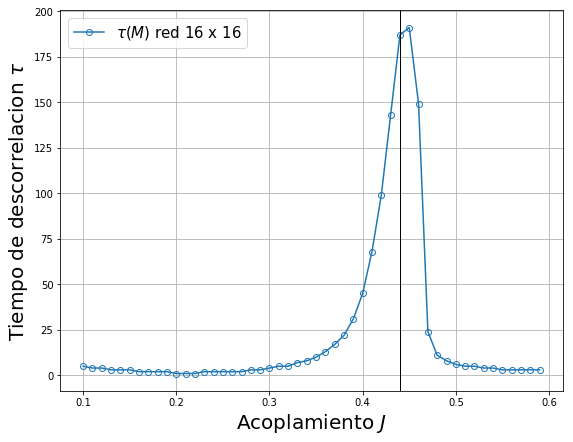

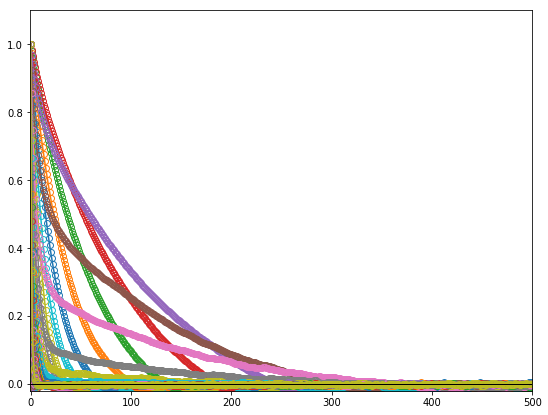

In [28]:
os.chdir(r"C:\Users\igna\Desktop\Igna\Facultad\Fisica computacional\TP2-Computacional-Ising\Ejercicio 2\item b)")
A = np.loadtxt("M16_J_Tau_Correlacion.txt")
plt.figure(figsize = (9,7))
plt.plot(A[:,0],A[:,1],'o-', fillstyle = "none", label= "$\u03C4(M)$ red 16 x 16")
plt.axvline(0.44, color = "k", linewidth = 1)
plt.xlabel("Acoplamiento $J$", fontsize = 20) #ver acá si es J* o lo que sea
plt.ylabel("Tiempo de descorrelacion $\u03C4$", fontsize = 20);
plt.legend(fontsize = 15)
plt.grid()

plt.figure(figsize = (9,7))
vector_I = np.arange(0,49,1)
for i in vector_I:
    plt.plot(A[i,2:],'o-',fillstyle = "none")
plt.axis([-.5,500,-.02,1.1])
plt.axhline(0, color = "k", linewidth = 1)

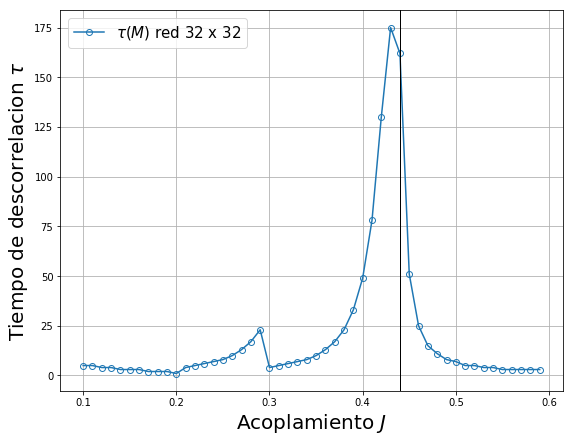

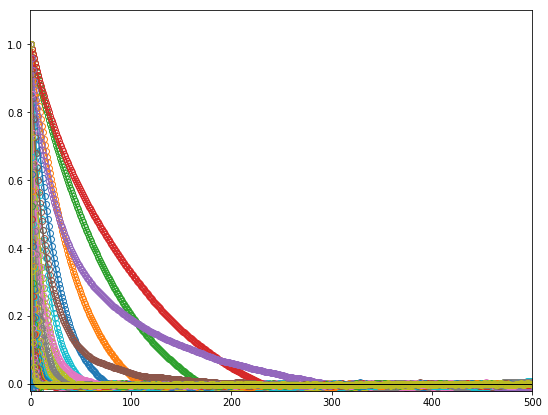

In [34]:
os.chdir(r"C:\Users\igna\Desktop\Igna\Facultad\Fisica computacional\TP2-Computacional-Ising\Ejercicio 2\item b)")
A = np.loadtxt("M32_J_Tau_Correlacion.txt")
plt.figure(figsize = (9,7))
plt.plot(A[:,0],A[:,1],'o-', fillstyle = "none", label= "$\u03C4(M)$ red 32 x 32")
plt.axvline(0.44, color = "k", linewidth = 1)
plt.xlabel("Acoplamiento $J$", fontsize = 20) #ver acá si es J* o lo que sea
plt.ylabel("Tiempo de descorrelacion $\u03C4$", fontsize = 20);
plt.legend(fontsize = 15)
plt.grid()

plt.figure(figsize = (9,7))
vector_I = np.arange(0,49,1)
for i in vector_I:
    plt.plot(A[i,2:],'o-',fillstyle = "none")
plt.axis([-.5,500,-.02,1.1])
plt.axhline(0, color = "k", linewidth = 1)

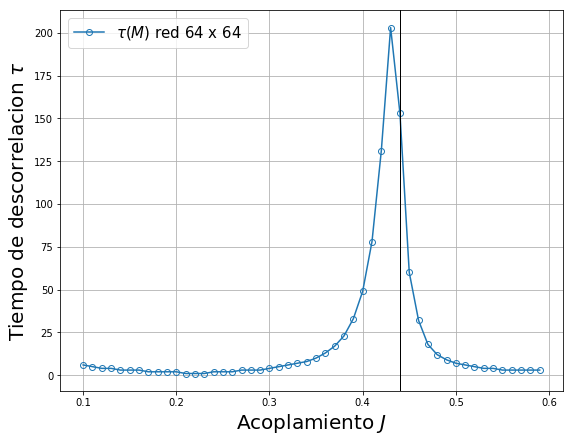

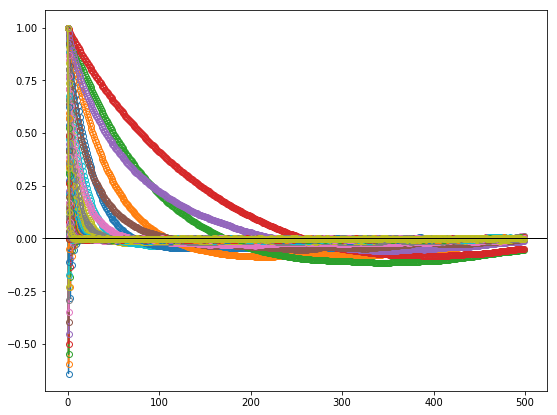

In [29]:
os.chdir(r"C:\Users\igna\Desktop\Igna\Facultad\Fisica computacional\TP2-Computacional-Ising\Ejercicio 2\item b)")
A = np.loadtxt("M64_J_Tau_Correlacion.txt")
plt.figure(figsize = (9,7))
plt.plot(A[:,0],A[:,1],'o-', fillstyle = "none", label= "$\u03C4(M)$ red 64 x 64")
plt.axvline(0.44, color = "k", linewidth = 1)
plt.xlabel("Acoplamiento $J$", fontsize = 20) #ver acá si es J* o lo que sea
plt.ylabel("Tiempo de descorrelacion $\u03C4$", fontsize = 20);
plt.legend(fontsize = 15)
plt.grid()

plt.figure(figsize = (9,7))
vector_I = np.arange(0,49,1)
for i in vector_I:
    plt.plot(A[i,2:],'o-',fillstyle = "none")
#plt.axis([-.5,200,-.02,1.1])
plt.axhline(0, color = "k", linewidth = 1)

In [32]:
def Valores_medios(A):
    Ly = len(A[:,0])
    J = A[:,0]
    mean_A = np.mean(A[:,1:], axis = 1)
    var_A = np.var(A[:,1:], axis = 1)
    return mean_A, var_A, J

os.chdir(r"C:\Users\igna\Desktop\Igna\Facultad\Fisica computacional\TP2-Computacional-Ising\Ejercicio 2\item d)")